In [49]:
from tensorflow.keras.datasets.mnist import load_data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import time
from tqdm import tqdm
%matplotlib inline

(X_train, Y_train), (X_test, Y_test) = load_data()

# 画像データの変換
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

In [52]:
# 検証用データとして確保する割合
value_size = 0.01
# 訓練時のテストデータとして確保する割合
test_size = 0.1
random_state = 60
# knn法のkの値
k = 5

accuracies = []  # 正確度保存用
proc_time = []   # 実行時間保存用

trData, valData, trLabels, valLabels = train_test_split(np.array(X_train),
                                                        Y_train, test_size=value_size,
                                                        random_state=random_state
                                                       )
print("trData(学習用データ): ", trData.shape)
print("valData(検証用データ): ", valData.shape)
# print("trLabels: ", trLabels)
# print("valLabels: ", valLabels)

trainData, testData, trainLabels, testLabels = train_test_split(trData,
                                                                trLabels,
                                                                test_size=test_size,
                                                                random_state=42
                                                               )
print("trainData(訓練時の学習データ): ", trainData.shape)
print("testData(訓練時のテストデータ): ", testData.shape)
print("trainLabels(学習データの正解ラベルの数): ", len(trainLabels))
print("testLabels(テストデータの正解ラベルの数): ", len(testLabels))

start = time.time()  # 時間計測開始
model = KNeighborsClassifier(n_neighbors=k)
model.fit(trainData, trainLabels)
duration = time.time() - start  # 計測終了

trData(学習用データ):  (59400, 784)
valData(検証用データ):  (600, 784)
trainData(訓練時の学習データ):  (53460, 784)
testData(訓練時のテストデータ):  (5940, 784)
trainLabels(学習データの正解ラベルの数):  53460
testLabels(テストデータの正解ラベルの数):  5940


In [53]:
val_predict = model.predict(valData)
print(len(val_predict))

600


In [54]:
val_predict = list(val_predict)
print(val_predict)

[1, 7, 9, 8, 9, 4, 5, 4, 5, 0, 1, 7, 5, 8, 0, 9, 4, 0, 2, 0, 1, 7, 3, 6, 0, 5, 2, 3, 2, 9, 5, 5, 1, 5, 9, 3, 6, 3, 8, 6, 8, 6, 5, 2, 5, 5, 7, 2, 1, 2, 4, 8, 8, 7, 3, 5, 2, 8, 4, 0, 4, 6, 7, 5, 4, 2, 2, 1, 9, 2, 6, 1, 7, 0, 0, 9, 7, 9, 6, 1, 7, 2, 5, 6, 1, 6, 9, 2, 9, 4, 8, 0, 2, 4, 1, 5, 5, 7, 4, 9, 3, 9, 3, 1, 2, 0, 1, 2, 0, 1, 5, 7, 4, 5, 9, 9, 1, 6, 0, 0, 7, 1, 3, 7, 7, 1, 2, 7, 7, 1, 3, 5, 2, 3, 0, 2, 9, 2, 7, 0, 5, 6, 3, 8, 5, 8, 5, 9, 0, 5, 0, 5, 2, 9, 7, 8, 6, 7, 6, 8, 7, 4, 8, 8, 5, 2, 4, 8, 9, 2, 0, 8, 0, 0, 0, 2, 7, 4, 9, 6, 5, 9, 5, 7, 2, 2, 4, 2, 4, 5, 8, 8, 9, 7, 9, 3, 6, 5, 5, 4, 3, 3, 8, 5, 1, 1, 2, 9, 7, 7, 9, 5, 0, 9, 6, 3, 3, 3, 9, 7, 6, 6, 0, 3, 7, 7, 3, 0, 4, 3, 3, 6, 9, 5, 7, 0, 6, 8, 8, 0, 5, 6, 7, 3, 3, 4, 8, 1, 6, 4, 3, 8, 5, 1, 7, 9, 1, 4, 6, 4, 3, 1, 1, 9, 9, 0, 4, 9, 8, 7, 8, 2, 8, 3, 8, 9, 7, 1, 8, 8, 4, 3, 8, 7, 1, 9, 1, 9, 7, 3, 1, 0, 7, 1, 3, 7, 7, 3, 6, 9, 1, 2, 7, 2, 4, 0, 2, 6, 3, 0, 2, 1, 9, 1, 5, 1, 2, 1, 6, 5, 9, 0, 4, 5, 5, 5, 4, 3, 4, 9, 6, 7, 7, 

In [55]:
score = model.score(valData, valLabels)
print("[%d] score: {:.2f}".format(score) % k)

[5] score: 0.97


In [56]:
valLabels

array([1, 7, 9, 8, 9, 4, 5, 4, 5, 0, 7, 7, 5, 8, 0, 9, 4, 0, 2, 0, 1, 7,
       3, 6, 0, 5, 2, 3, 2, 9, 5, 5, 1, 5, 9, 3, 6, 3, 8, 6, 8, 6, 5, 2,
       5, 5, 7, 2, 1, 2, 4, 8, 8, 0, 3, 5, 2, 8, 4, 0, 4, 6, 7, 5, 4, 2,
       2, 1, 9, 2, 6, 1, 7, 0, 0, 9, 7, 9, 6, 1, 7, 2, 5, 6, 1, 6, 9, 2,
       9, 4, 8, 0, 2, 4, 1, 5, 5, 7, 5, 9, 3, 9, 3, 1, 2, 0, 1, 2, 0, 1,
       5, 7, 4, 5, 3, 9, 1, 6, 2, 0, 7, 1, 3, 7, 7, 1, 2, 7, 7, 1, 3, 5,
       2, 3, 0, 2, 9, 2, 7, 0, 5, 6, 3, 8, 5, 8, 5, 9, 0, 5, 0, 5, 2, 9,
       7, 8, 6, 7, 6, 8, 7, 4, 8, 8, 5, 2, 4, 8, 9, 2, 0, 8, 0, 0, 0, 2,
       7, 4, 9, 6, 5, 9, 5, 7, 2, 2, 4, 2, 4, 5, 8, 8, 9, 7, 9, 3, 6, 5,
       5, 4, 3, 3, 8, 5, 1, 1, 2, 9, 7, 7, 9, 5, 0, 9, 6, 3, 3, 3, 9, 7,
       6, 6, 0, 3, 7, 7, 3, 0, 4, 3, 3, 6, 9, 5, 7, 0, 6, 8, 8, 0, 5, 6,
       7, 3, 3, 4, 8, 1, 6, 4, 3, 8, 5, 1, 7, 9, 8, 4, 6, 4, 3, 1, 1, 9,
       9, 0, 4, 9, 8, 7, 8, 2, 8, 3, 8, 9, 7, 1, 8, 8, 4, 3, 8, 7, 1, 9,
       1, 9, 7, 3, 1, 0, 7, 1, 3, 7, 7, 3, 6, 9, 1,

In [57]:
wrong_list = []
wrong_value = []
correct_value = []
for i in range(len(val_predict)):
    if val_predict[i] != valLabels[i]:
        wrong_list.append(i)
        wrong_value.append(val_predict[i])
        correct_value.append(valLabels[i])

In [58]:
wrong_list

[10, 53, 98, 114, 118, 256, 358, 382, 391, 394, 495, 523, 537, 560, 561, 572]

In [59]:
wrong_value

[1, 7, 4, 9, 0, 1, 7, 7, 1, 0, 1, 0, 0, 5, 3, 1]

In [60]:
correct_value

[7, 0, 5, 3, 2, 8, 9, 2, 8, 9, 2, 5, 2, 6, 9, 8]

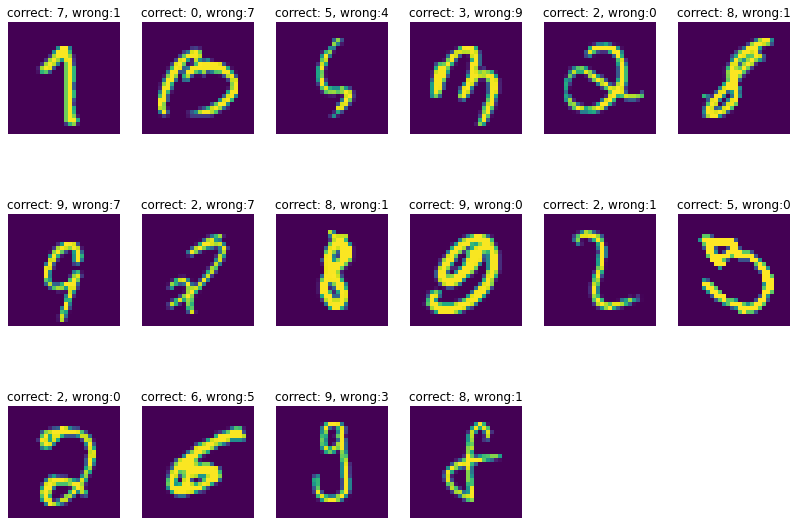

In [61]:
plt.figure(figsize=(14,10))
for i in range(len(correct_value)):
    ax = plt.subplot(3, 6, i + 1)
    ax.set_axis_off()
    ax.set_title( "correct: {}, wrong:{}".format(correct_value[i], wrong_value[i]))
    plt.imshow(valData[wrong_list[i]].reshape(28, 28).astype("uint8"))
plt.show()